In [1]:
import pandas as pd
from path import Path
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")
# standard scale import
from sklearn.preprocessing import StandardScaler
# import PCA
from sklearn.decomposition import PCA
# import t-SNE
from sklearn.manifold import TSNE
#import KMeans
from sklearn.cluster import KMeans

In [2]:
# Data loading
file_path = Path("Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# remove/separate myopic column and split the data
X = df_myopia.drop(columns=['MYOPIC'], axis=1)
y = df_myopia['MYOPIC']

In [4]:
# scale the X data
scaler = StandardScaler()

In [5]:
# scale X data
X_scaled = scaler.fit_transform(X)

In [6]:
# set up the PCA model to reflect 90% of the variance
pca = PCA(n_components = .90) 

In [7]:
# fit the PCA model on to the scaled data
prin_components = pca.fit_transform(X_scaled)

In [8]:
# use the shape attribute to tell the # of principal components
prin_components.shape

(618, 10)

In [9]:
# confirm the sum of the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

In [10]:
# initialize t-SNE model using output of the PCA transformation (the prin_components)
tsne = TSNE(learning_rate=35, perplexity=50)

In [11]:
# reduce dimensions
tsne_features = tsne.fit_transform(prin_components)

In [12]:
# the dataset has two columns
tsne_features.shape

(618, 2)

In [13]:
# prepare to plot dataset

# first column of transformed features
x = tsne_features[:,0]

# the second column of transformed features
y = tsne_features[:,1]

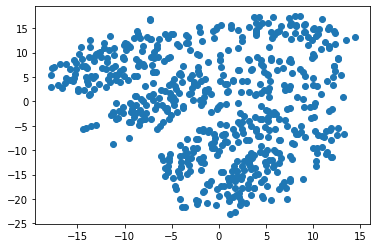

In [14]:
# visualize the clusters
plt.scatter(x, y)
plt.show()

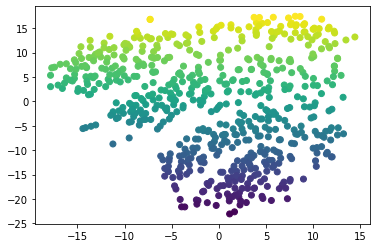

In [16]:
# visulize clusters with color
plt.scatter(x, y, c=y)
plt.show()

Create an elbow plot to identify the best number of clusters. Make sure to do the following:


Use a for loop to determine the inertia for each k between 1 through 10.


If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [17]:
inertia = []
k = list(range(1,11))

# calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)
    
# Create the Elbow Curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,234007.104068
1,2,126211.687610
2,3,93108.597058
3,4,78236.040289
4,5,67245.959484


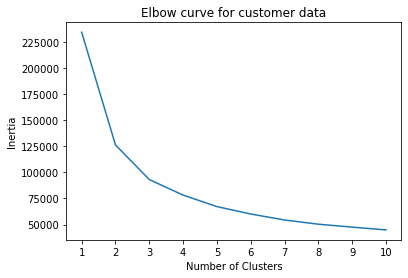

In [18]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

The elbow of the plot appears to be at the inertia of approx. 93,000 at k=3

### Conclusion

Based on the findings from the various algorithms used in the Unsupervised ML Model above, There appears to be 4-5 distinct groups of patients that they can be clustered together. This is evident by the visualized clusters in cell 16.